# Project 5: Dimensionality Reduction

### Names: Keiran Berry
### Course Level: Undergraduate

**Introduction:**
* In this project, we re-explore building classification models but in a reduced dimensional space

<u>**Note:** The project will be graded by me running your notebook from top to bottom (choosing the "run all" option) - if it errors out at any point - this is where I stop grading and you'll lose ALL points after the error - Even if they are correct!</u>

* <u>Moral of the story is, **Make sure your entire notebook executes from top to bottom and you're happy with the results BEFORE you submit to the drop box!**</u>

## **Important Note:** This project you will subit BOTH your .ipynb file AND your file converted to a PDF (I don't want to wait for 10 minutes each project for your models to converge over several dimensions)

**Objectives:**
* The objective of this project is to use scikit-learn to investigate different dimensionality reduction approaches for building classificatino models on imaging data

# Let's grab the data and have a look at the dataset

## **Important note, to get the data, we need to install the UCIMLRepo package using pip**
* In your command line, run the following:
    - pip install ucimlrepo

## All Students

**Problem A (100pts)**

1 (20pts). Let's grab the data from kaggle and look at a few of the digits

* Note: a description of the dataset can be found [Here](https://www.kaggle.com/datasets/zalando-research/fashionmnist)
* Note: The targets are labeled [0,1,2....]
* **Create 2 x 5 grid of digits where one digit from each class is displayed**
    - see plt.imshow() for details on displaying images (use the cmap='gray' option)
    - see .reshape() to see how to convert your images from a vector to a 28 x 28 image

* <u><b>Questions:</b> How many features are there per observation? What do these features represent? How many classes? How many observations are in the data?</u>

In [7]:
# grab the needed imports #
import numpy as np
import kagglehub # need to install this: pip install kagglehub
import pandas as pd
import matplotlib.pyplot as plt

# Download latest version
path = kagglehub.dataset_download("zalando-research/fashionmnist")

# The data is stored in a path on your hard drive in .csv files #
print("Path to dataset files:", path)

Path to dataset files: C:\Users\101080740\.cache\kagglehub\datasets\zalando-research\fashionmnist\versions\4


In [8]:
# Get the data #
data_train = pd.read_csv(path + "/fashion-mnist_train.csv")
data_test = pd.read_csv(path + "/fashion-mnist_test.csv")

In [9]:
# Grab the training data and testing data and store for model development #
trainX = data_train.iloc[:, 1:]  # first column is labels so we want the rest
trainY = data_train.iloc[:, 0]   # now we want the labels

testX = data_test.iloc[:, 1:] # rest are data
testY = data_test.iloc[:, 0]  # first contains labels


# Print the shape of the training and testing data #
print("Shape of training data:", trainX.shape, trainY.shape)
print("Shape of testing data:", testX.shape, testY.shape)



# Normalize the digits to [-1,1] for better scaling (we'll still use the StandardScalar later) #
trainX = (trainX / 127.5) - 1 # same formula I used last time I did this
testX = (testX / 127.5) - 1


Shape of training data: (60000, 784) (60000,)
Shape of testing data: (10000, 784) (10000,)


Unique classes:  10


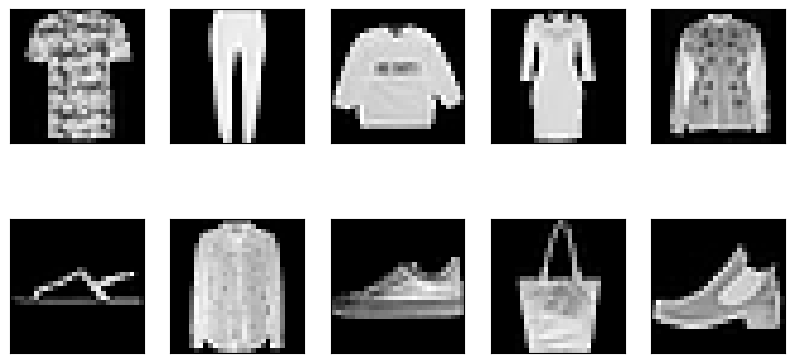

In [10]:

# Plot one image from each class #
# same formula as I used in project 3 for this one
fig, axes = plt.subplots(2, 5, figsize=(10, 5))

uniqueLabels = np.unique(trainY)
print("Unique classes: ", len(uniqueLabels))

for i, label in enumerate(uniqueLabels):
    index = np.where(trainY == label)[0][0] 
    
    ax = axes[i // 5, i % 5] 
    ax.imshow(trainX.iloc[index].values.reshape(28, 28), cmap="gray") 
    ax.set_xticks([])
    ax.set_yticks([])

plt.show()

## Problem A.1 Discussion:
* There are 784 features per observation, one for each pixel in a 28x28 image.
* These features each represent one pixel of the image.
* There are 10 unique classes, as can be seen by the size of the unique label array.
* There are 70,000 observations in the data. 60,000 of them are in the training set, and 10,000 are in the testing set.

2 (10pts). Now let's see how much variation there is between the classes

* Write a code chunk to display a 25 x 25 grid of images where the user selects what class they want to see (**you do NOT need to use input here**)

* <u><b>Questions:</b> Do all the items in a single class look the same?  What items have the most variability (and as a result might be difficult to classify?)</u>

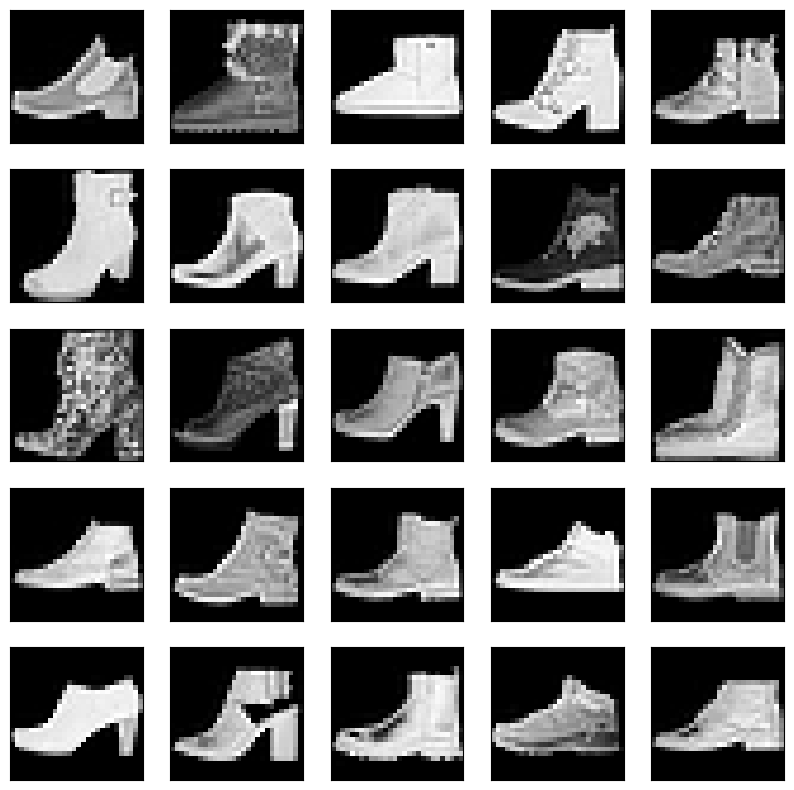

In [13]:
# Let's look at the variations between a single class (0-9) #
# Plot 25 different observations from a class of your choice #

# using same formula as I used in project 3 again
chosenClass = 9 # changing this around to see what the classes look like, not using user input this time :)
indices = np.where(trainY == chosenClass)[0][:25]

fig, axes = plt.subplots(5, 5, figsize=(10, 10))

for i, index in enumerate(indices):
    ax = axes[i // 5, i % 5]
    ax.imshow(trainX.iloc[index].values.reshape(28, 28), cmap="gray")
    
    ax.set_xticks([])  
    ax.set_yticks([])

plt.show()


## Problem A.2 Discussion:
* There are some classes where the items look very similar and consistent throughout. The trousers, dresses, sandals, sneakers, bags, and ankle boots are all relatively clear to see and have many similarities within their own classes.
* The t-shirts/tops and the shirts have a lot of overlap with each other. I don't even know that I could get the classifications right on these. They also are not consistent with sleeves and could get confused with pullovers or coats, which are another case of sharing many similarities to each other. I could see t-shirts/tops being confused with shirts and pullovers being confused with coats.

## Let's get the data ready for building a classifier

3 (10pts). The feature space is quite large (784 dimensions), let's do some dimensionality reduction using PCA

* We already have a test and training set, so we don't need to generate a test/train split
* We DO however need to scale the data to have zero mean and unit standard deviation

### Once the data is ready, let's compute the principal components 

* Similar to problem A.1 above, create a 2 x 5 grid and plot first 10 eigenimages for a user selected class

In [16]:
# Scale the data using StandardScaler #
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

trainX = scaler.fit_transform(trainX)
testX = scaler.transform(testX)


In [17]:
# Compute the principal components for a single class #
from sklearn.decomposition import PCA

chosenClass = 0 # not using user input 
dataForClass = trainX[trainY == chosenClass] # get training data all from one class

pca = PCA(n_components = 10) # 10 eigenimages
pca.fit(dataForClass)

PCA(n_components=10)

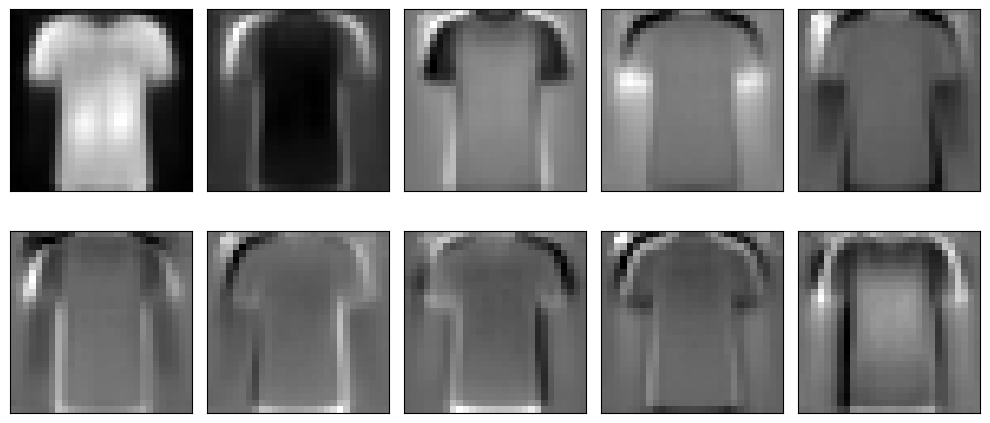

In [18]:
# Display the first 10 eigenimages for a user specified class #
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i].reshape(28, 28), cmap="gray")
    ax.set_xticks([])
    ax.set_yticks([])
plt.tight_layout()
plt.show()

## Now let's go ahead and compute the principal components for the entire dataset

4 (20pts). Compute the principal components for the dataset and do the following:

* Project the data onto the first two components and scatter plot them to see how separated the classes are
    - Be sure to color code each class and put the class label at the mean of each class so it's easy to see each class in 2-dimensions
* Next, look at the cumulative variance and determine how many PCs (i.e., $k$) you need to keep to capture 85% of the variance.
* Once determined, project the data onto the first $k$ components to build the classifier

* <u><b>Questions:</b> How separated are the classes in 2-dimensional space?  How many components are required to capture 85% of the variance?</u>

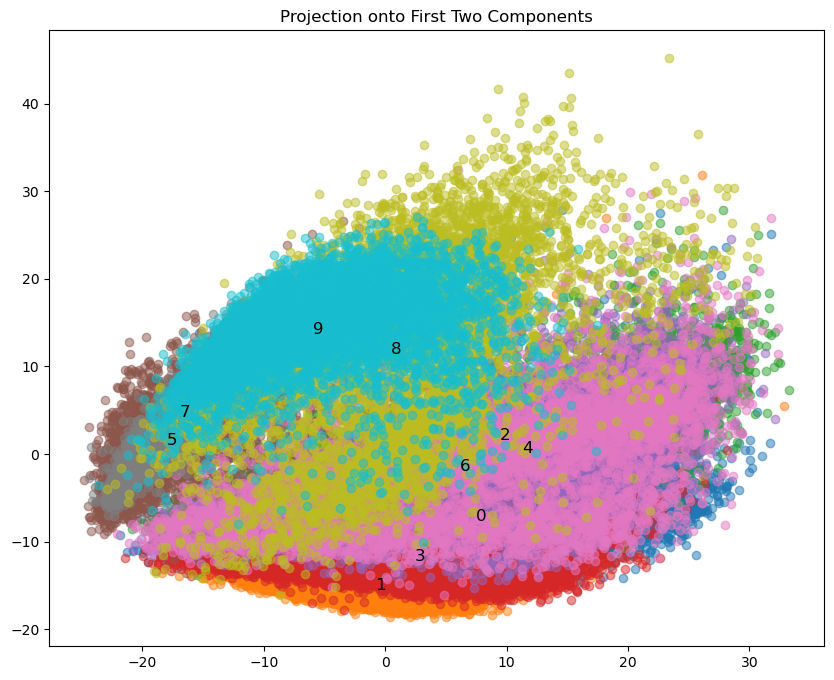

In [20]:
# Compute the PCS for all the data #
pca = PCA()
pca.fit(trainX)
projectedData = pca.transform(trainX)[:, :2] # project data onto the first 2 components

plt.figure(figsize=(10, 8))
for label in np.unique(trainY):
    indices = trainY == label
    plt.scatter(projectedData[indices, 0], projectedData[indices, 1], alpha=0.5) # adding transparency to see overlap easier
    meanX = projectedData[indices, 0].mean() # get the mean location
    meanY = projectedData[indices, 1].mean()
    plt.text(meanX, meanY, str(label), fontsize=12, ha='center', va='center') # plot the labels at the mean of each class

plt.title("Projection onto First Two Components")
plt.show()

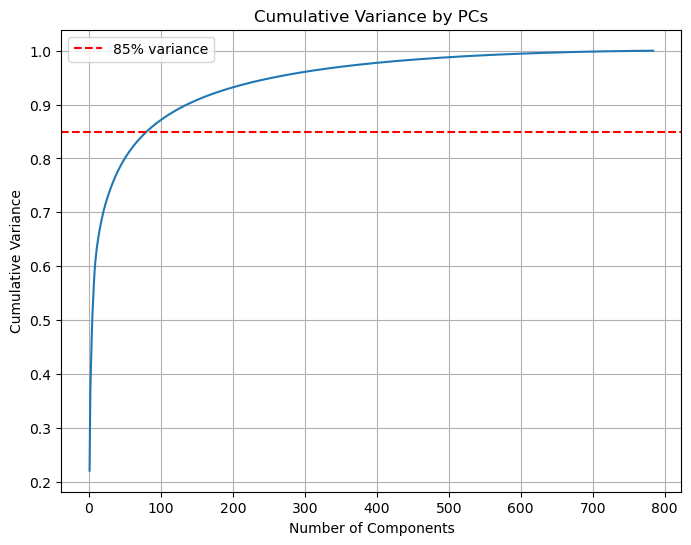

Number of components to retain 85% of the explained variance: 81


In [21]:
# Plot the cumulative variance and determine the value k to retain 85% of the explained variance #
cumulativeVariance = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulativeVariance) + 1), cumulativeVariance)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance')
plt.title('Cumulative Variance by PCs')
plt.axhline(y=0.85, color='r', linestyle='--', label="85% variance")
plt.legend()
plt.grid(True)
plt.show()

# calculating k for 85%
k = np.argmax(cumulativeVariance >= 0.85) + 1 # gets the index of the first time 85% of explained var is retained, +1 to get out of 0-indexing
print("Number of components to retain 85% of the explained variance: " + str(k))

## Problem A.4 Discussion:
* The classes are not separated well at all in 2-dimensional space. We can see in the plot that they are basically all stacked on top of each other.
* The number of components needed to capture 85% of the variance is 81. I manually calculated and printed this as well as plotting a line where cumulative variance is .85, and we can see that the line matches the calculation.

5 (30pts). Let's build the model for classification:

* To investigate the effect of reducing the dimensions of the features space on classification rates, build your classifier in the reduced dimensional space starting with 10 dimensions, and increasing by 10 dimensions up to the max $k$ found in Problem A.4
    - You should create a plot to shows accuracy as a function of subspace dimension $k$
* **You are free to build the classifier of your choice here: Logistic Regression, SVC, Decision Trees, Random Forest, etc. but pick one and stick with it across all subspace dimensions to be able to compare apples to apples (i.e., same parameters, for all models)

* <u><b>Questions:</b> What effect (if any) does reducing the feature dimension have on the classification accuracy?  Do you get to a point of diminishing returns?  Discuss</u>

In [24]:
# Using the prinicpal components computed above, transform the test data #
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

dimensions = list(range(10, k, 10)) + [k]  #from 10 to k, incrementing by 10 dimensions each time and including k
accuracies = []

for n in dimensions:
    pca = PCA(n_components=n) # pca with that number of dimensions
    trainXPCA = pca.fit_transform(trainX)
    testXPCA = pca.transform(testX)
    
    logisticRegression = LogisticRegression()
    logisticRegression.fit(trainXPCA, trainY)
    
    predictions = logisticRegression.predict(testXPCA)
    accuracy = accuracy_score(testY, predictions)
    accuracies.append(accuracy)

    print(f"Dimensions: {n}, Accuracy: {accuracy:.4f}")


C:\Users\101080740\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Dimensions: 10, Accuracy: 0.7539


C:\Users\101080740\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Dimensions: 20, Accuracy: 0.8006


C:\Users\101080740\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Dimensions: 30, Accuracy: 0.8151


C:\Users\101080740\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Dimensions: 40, Accuracy: 0.8244


C:\Users\101080740\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Dimensions: 50, Accuracy: 0.8304


C:\Users\101080740\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Dimensions: 60, Accuracy: 0.8386


C:\Users\101080740\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Dimensions: 70, Accuracy: 0.8423


C:\Users\101080740\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Dimensions: 80, Accuracy: 0.8441
Dimensions: 81, Accuracy: 0.8446


C:\Users\101080740\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


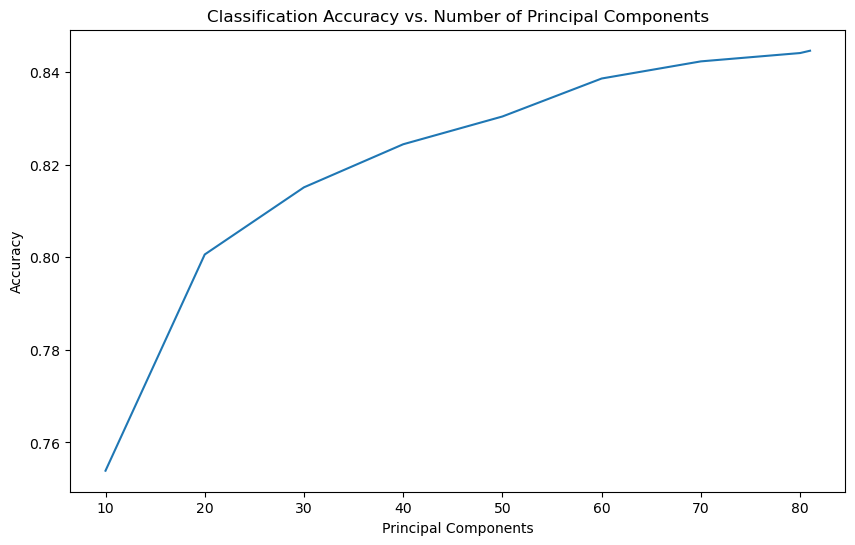

In [25]:
# Plot the results #
plt.figure(figsize=(10, 6))
plt.plot(dimensions, accuracies)
plt.xlabel('Principal Components')
plt.ylabel('Accuracy')
plt.title('Classification Accuracy vs. Number of Principal Components')
plt.show()

## Problem A.5 Discussion:
* Reducing the feature dimension boosts classification accuracy overall because the 784-dimension feature space does not allow the model to focus on the most important features. We can see that increasing the number of principal components also increases the classification accuracy, as well.
* We do get to a point of diminishing returns. When observing the plot, the growth looks logarithmic. Accuracy initially has large jumps, and each subsequent increase in PCA dimensions has less of a return than the previous one did, with the exception of jumping from 50 to 60. After 60, returns are dramatically diminished. Because of this, 60 dimensions seems to be a good balance between model efficiency and classification capabilities.

## CSC 549 Students Only!

### Repeat the analysis above (Problem A.3 - A.5) but instead of using PCA for dimensionality reduction, use LDA (we have class labels so let's capitalize on that)

* **Note:** We can only have at most a C-1 = 9 dimensional subspace for LDA
    - Therefore, for the accuracy plot, your range will be from $k-2,3,4,\cdots,9$ dimensions
* Similarly, you will only get 9-Fisher images so your image grid will be 1 x 9 instead of 2 x 5 as in problem A.3